In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset("diamonds")
df.head()

# Basic info
print("Shape:", df.shape)
print("\nData Info:\n")
df.info()
print("\nDescription:\n", df.describe())


Shape: (53940, 10)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB

Description:
               carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761 

In [2]:
# Missing values & duplicates
print("\nMissing:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
Duplicate rows: 146


In [3]:
# Convert object columns to category
for col in ['cut', 'color', 'clarity']:
    df[col] = df[col].astype('category')

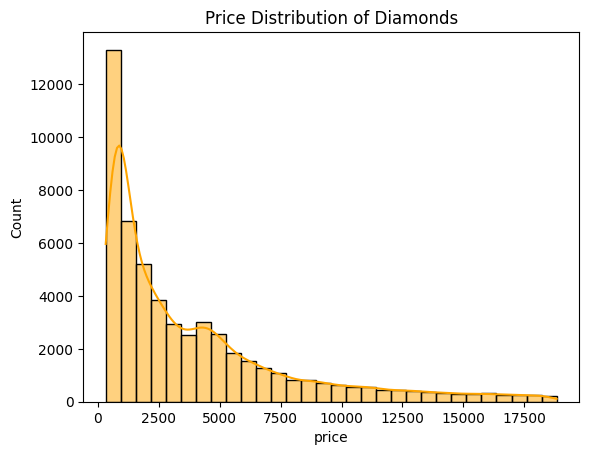

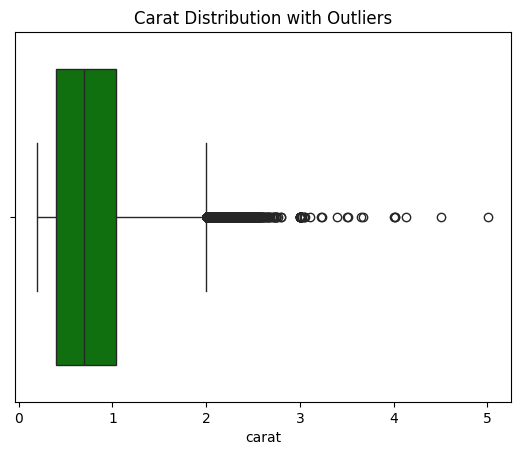

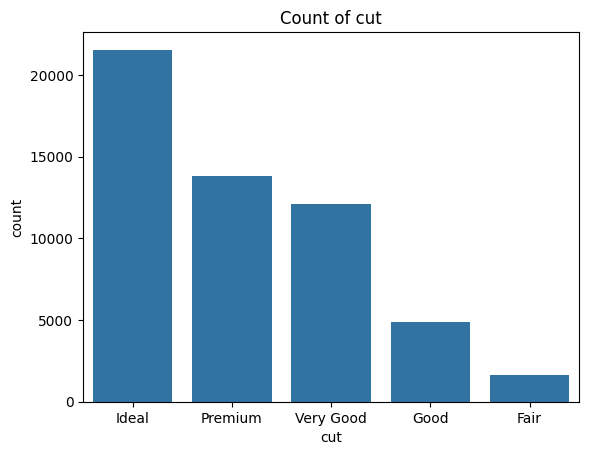

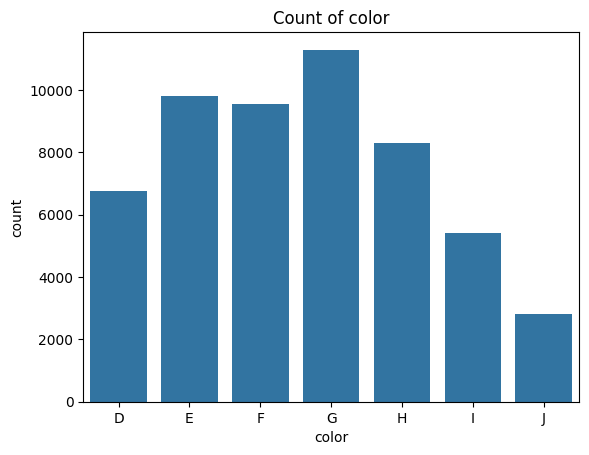

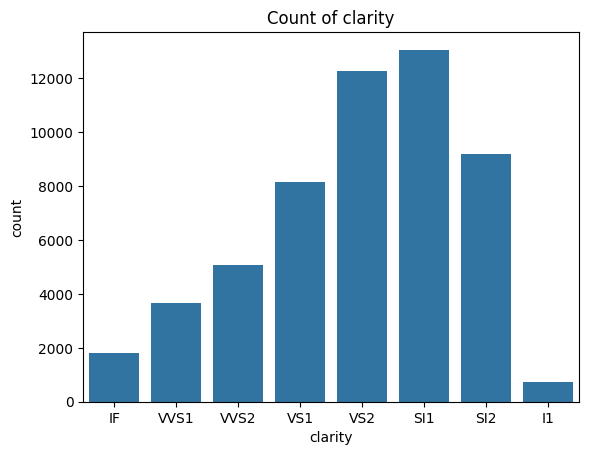

In [4]:

# === Univariate Analysis ===
# Histogram for Price
sns.histplot(df['price'], bins=30, kde=True, color='orange')
plt.title("Price Distribution of Diamonds")
plt.show()

# Boxplot for Carat
sns.boxplot(x=df['carat'], color='green')
plt.title("Carat Distribution with Outliers")
plt.show()

# Count plots for Categorical features
for col in ['cut', 'color', 'clarity']:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()

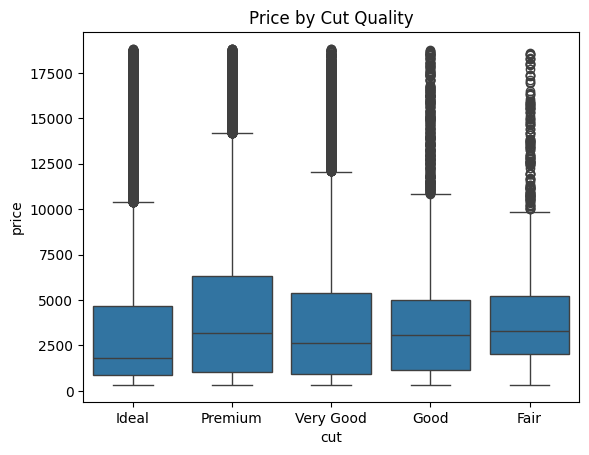

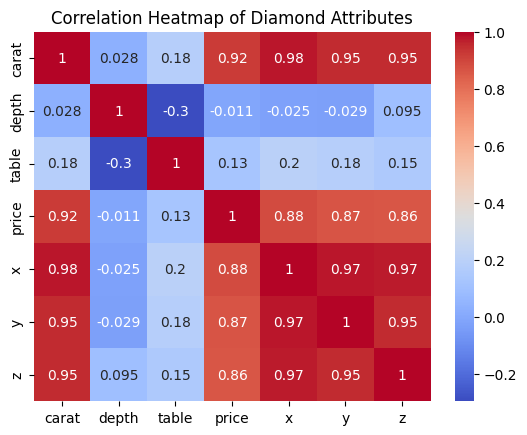

In [5]:
# === Bivariate Analysis ===
# Price by Cut
sns.boxplot(x='cut', y='price', data=df)
plt.title("Price by Cut Quality")
plt.show()

# Correlation heatmap
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Diamond Attributes")
plt.show()

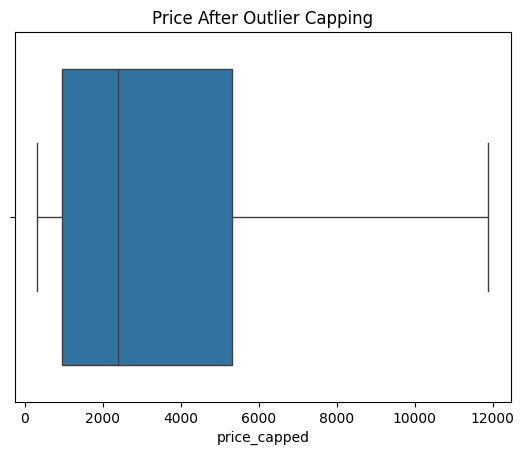

In [6]:
# === Outlier Detection using IQR ===
Q1, Q3 = df['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df['price_capped'] = df['price'].clip(lower, upper)

sns.boxplot(x=df['price_capped'])
plt.title("Price After Outlier Capping")
plt.show()

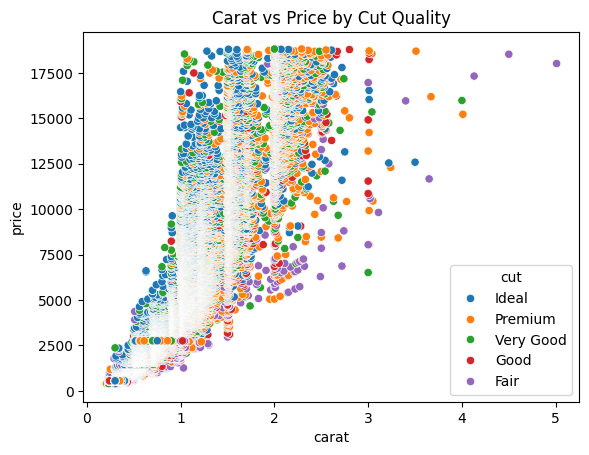

In [7]:
# === Feature Engineering ===
# Create new feature: Volume
df['volume'] = df['x'] * df['y'] * df['z']

# Scatterplot of Carat vs Price
sns.scatterplot(x='carat', y='price', hue='cut', data=df)
plt.title("Carat vs Price by Cut Quality")
plt.show()

In [8]:
# Save cleaned dataset
df.to_csv("Diamonds_cleaned.csv", index=False)
print("\nCleaned Diamonds data saved as Diamonds_cleaned.csv")


Cleaned Diamonds data saved as Diamonds_cleaned.csv
